In [1]:
import numpy as np
import networkx as nx
from dotmotif import Motif, GrandIsoExecutor
import pandas
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
from scipy.stats import ranksums
import statsmodels.stats.multitest as smm


c:\Users\saika\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\saika\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\saika\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import v1dd_coregistration_wrangling

In [3]:
def calc_ground_truth(pre_cells, synapse, post_cells, use_sizes=False):
    pre_cell_pt_index = pre_cells['pt_root_id']
    post_cell_pt_index = post_cells['pt_root_id']
    synapses = synapse[(synapse['pre_pt_root_id'].isin(pre_cells['pt_root_id'])) & (synapse['post_pt_root_id'].isin(post_cells['pt_root_id']))]
    pre_cell_pt_index = pre_cell_pt_index.to_list()
    post_cell_pt_index = post_cell_pt_index.to_list()

    synapse_connectome = np.zeros((len(pre_cells), len(post_cells)))
    for synapse in tqdm(range(len(synapses))):
        preidx = pre_cell_pt_index.index(synapses.iloc[synapse]['pre_pt_root_id'])
        postidx = post_cell_pt_index.index(synapses.iloc[synapse]['post_pt_root_id'])
        if use_sizes:
            synapse_connectome[preidx,postidx] += synapses.iloc[synapse]['size']
        else:
            synapse_connectome[preidx,postidx] += 1
    return synapse_connectome

In [4]:

tables, mappings = v1dd_coregistration_wrangling.get_tables_and_mappings(online=True)
cell_table_original = tables['cell']

# # cell_table = cell_table.query('soma_layer == "23"')[['pt_root_id', 'soma_layer']].reset_index()
cell_table_original['connectome_index'] = cell_table_original.index

cell_table = cell_table_original   #.query('soma_layer == "23"')[['connectome_index', 'pt_root_id', 'soma_layer']].reset_index()
# cell_table['connectome_index'] = cell_table.index
# cell_table = cell_table.query('cell_type == "PYC"')[['connectome_index', 'pt_root_id', 'soma_layer']].reset_index()

synapse_table = pandas.read_feather('C://Users//saika//Downloads//v1dd_with_additional_coregistered_neurons_Julian_latest_now//v1dd_with_additional_coregistered_neurons_Julian_latest//additional_coregistered_neurons//synapse_table_v1dd_shortened_additional_cells.feather')
weight_matrix = calc_ground_truth(cell_table, synapse_table, cell_table, use_sizes=True)
adjacency_matrix = weight_matrix.clip(0,1)

100%|██████████| 159090/159090 [02:27<00:00, 1081.58it/s]


In [5]:
tables.keys()

dict_keys(['assemblies_by_roi_id', 'assemblies_by_pt_root_id', 'assemblies_by_connectome_index', 'assemblies_by_functional_index', 'functional_indexes_by_assembly', 'coregistration', 'cell'])

In [330]:
mappings.keys()

dict_keys(['pt_root_id_to_connectome_index', 'connectome_index_to_root_id', 'roi_id_to_pt_root_id', 'functional_index_to_roi_id'])

In [ ]:

tables['cell'].merge(tables['coregistration'],on = 'pt_root_id')

In [7]:
tables['cell']

,index,pt_root_id,target_id,cell_type,pt_position,soma_layer,full_connectome_index,connectome_index
0,3,864691132625300120,293764,PYC,"[882.3273740159214, 348.2992615823263, 49.7502...",4,0,0
1,19,864691132710501931,295576,BC,"[846.1511939783203, 407.8189411938162, 116.071...",5,1,1
2,27,864691132830575876,278405,MC,"[741.1664982372881, 269.52172688591605, 122.27...",23,2,2
3,34,864691132616354625,293733,BPC,"[862.543768852058, 349.23141366917696, 44.0541...",4,3,3
4,37,864691132999200949,307952,PYC,"[872.0169357283554, 490.6735632622339, 28.3308...",5,4,4
...,...,...,...,...,...,...,...,...
707,3752,864691132683090805,279145,BPC,"[776.0758196287981, 173.67105751498912, 189.25...",23,707,707
708,3754,864691132679146333,385115,PYC,"[979.9463704043851, 534.8907307114326, 152.600...",5,708,708
709,3756,864691132763271347,383491,PYC,"[933.106127419254, 463.0370044502767, 91.12912...",5,709,709
710,3759,864691132579592205,351167,BC,"[930.7398299477137, 190.36452769244295, 38.169...",23,710,710


In [317]:
coords = np.load("C://Users//saika//Downloads//transformed_coordinates.npy")

In [318]:
for idx,connections  in enumerate(coords):
    print(connections)

[882.32737402 348.29926158  49.75020578]
[846.15119398 407.81894119 116.07125181]
[741.16649824 269.52172689 122.27247498]
[862.54376885 349.23141367  44.054171  ]
[872.01693573 490.67356326  28.33086019]
[860.6451103  186.17554807 161.56262551]
[833.87409718 139.63120147  48.05512048]
[886.44713137 380.98663743 174.14449518]
[778.75217911 227.97907876  29.65780991]
[959.06392814 486.43743301  43.63223353]
[920.50286002  97.9829615   35.07975435]
[898.97293204 262.58648817  -4.22269313]
[902.92910416 309.01866171  71.657039  ]
[875.52738743  58.02125014 106.11935592]
[832.2314374  339.59716358 128.27197133]
[904.65556662 110.2182371  130.43562284]
[892.82283404 383.32181151  26.41460932]
[1048.09679495  647.30929287  168.25885396]
[854.29058011 390.5990283   18.00090094]
[863.90529833 248.68449103 104.25936056]
[843.33842288 154.53953132 122.17679993]
[894.5934509  209.06185526   2.20026037]
[938.48740152 546.45135259 121.28368879]
[770.93829808 279.65321728  85.92944826]
[816.48093441

In [302]:
for idx,cell_positions  in enumerate(cell_table['pt_position']):
    print(cell_positions )

[882.3273740159214, 348.2992615823263, 49.75020578184228]
[846.1511939783203, 407.8189411938162, 116.07125180671034]
[741.1664982372881, 269.52172688591605, 122.27247497941532]
[862.543768852058, 349.23141366917696, 44.05417100251122]
[872.0169357283554, 490.6735632622339, 28.33086019247048]
[860.6451102994386, 186.17554806627527, 161.56262551191656]
[833.8740971774184, 139.63120146905555, 48.05512048137461]
[886.447131370536, 380.98663742831985, 174.14449517505298]
[778.7521791075498, 227.9790787618906, 29.657809913010972]
[959.0639281429103, 486.43743301322735, 43.632233532594135]
[920.5028600223962, 97.98296149793168, 35.079754349497996]
[898.9729320433188, 262.5864881710404, -4.222693131428065]
[902.9291041637168, 309.0186617112993, 71.65703900094742]
[875.5273874273754, 58.021250135625536, 106.11935591686488]
[832.2314374003691, 339.59716357918194, 128.27197133098318]
[904.6555666166969, 110.2182370985619, 130.4356228405893]
[892.8228340357304, 383.32181151490573, 26.4146093208008

In [321]:
summed_psd_size = []
for idx,connections  in enumerate(weight_matrix):
    for conn_idx,conn_value in enumerate(connections):
        summed_psd_size.append(conn_value)

In [322]:
np.max(summed_psd_size)

106560.0

cell_table


In [323]:


G = nx.Graph()

for idx, sublist in enumerate(cell_table['pt_position']):
    pos1, pos2, pos3 = sublist  # Unpack the elements in the sublist #use co-ordinates from tables and check if pt_root_id matches
    pos1_rounded = round(pos1, 2)
    pos2_rounded = round(pos2, 2)
    G.add_node(idx, pos = [pos1_rounded, pos2_rounded])  


for idx,connections  in enumerate(weight_matrix):
    for conn_idx,conn_value in enumerate(connections):
        if 15000 < conn_value <= 30000:
            G.add_edge(idx,conn_idx, weight = 0.2, color = 'g')
        elif 30000 < conn_value <= 50000:
            G.add_edge(idx,conn_idx, weight = 0.8, color = 'b')
        elif 50000 < conn_value <= 60000:
            G.add_edge(idx,conn_idx, weight = 1.2, color = 'y')
        elif conn_value> 60000:
            G.add_edge(idx,conn_idx, weight = 2, color = 'm')
   # if idx>0:
   #     G.add_edge(idx-1, idx)  # Adding edge between consecutive nodes



In [324]:
colors = nx.get_edge_attributes(G,'color').values()
weights = nx.get_edge_attributes(G,'weight').values()

In [325]:
color_map = []
idx = []
for node in G.nodes():
    #for assembly_index in tables['assemblies_by_connectome_index'].keys():
        if node in  tables['assemblies_by_connectome_index'].keys():
            color_map.append('red')
            idx.append(node)
        else:
            color_map.append('lightgreen')
            #idx.append(node)


In [326]:
len(idx)

51

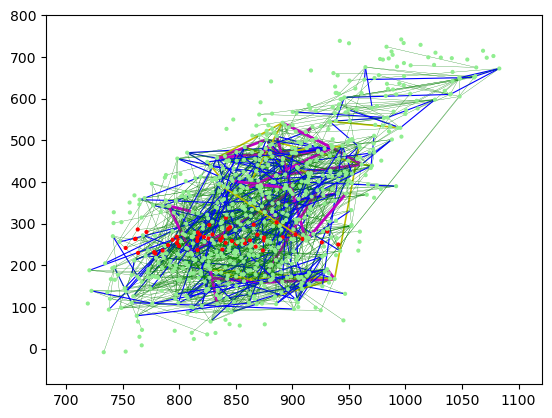

In [327]:
fig, ax = plt.subplots()



nx.draw(G, nx.get_node_attributes(G, 'pos'),
        width=list(weights),
        edge_color=colors, 
        with_labels=False,node_size=4,
        node_color=color_map, ax= ax)
limits=plt.axis('on') # turns on axis

ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.legend()

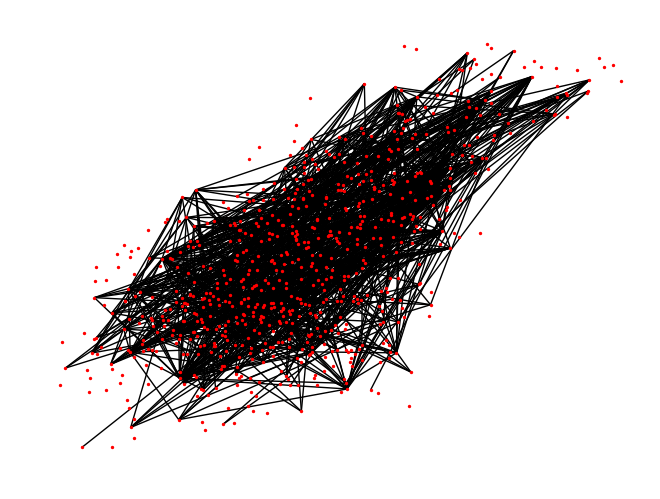

In [178]:
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=False, node_size=2, node_color = 'red')